In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### generate a synthetic data

In [2]:
x=np.arange(0,100,1)
y=0.5*x ## this is the true signal
n=10*np.random.randn(100) ## this is a random noise

### have a quick look at the data

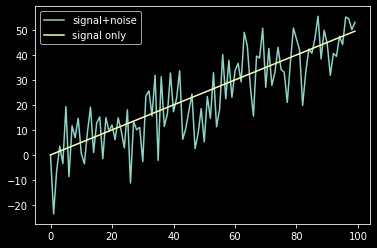

In [3]:
yy=y+n ## add noise to the true signal
plt.plot(x,yy);
plt.plot(x,y)
plt.legend(('signal+noise','signal only'));

### perform linear regression

In [4]:
C=np.cov(x,yy)
a=C[0,1]/C[0,0]
b=np.mean(yy)-a*np.mean(x)
print('regression coefficient is '+str(a))

regression coefficient is 0.5086510114622012


### let's plot the result

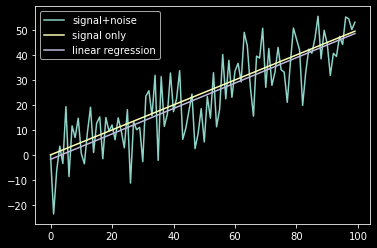

In [5]:
yyy=a*x+b
plt.plot(x,yy) ## yy is signal + noise
plt.plot(x,y)  ## y is signal only
plt.plot(x,yyy)## yyy is the linear regression
plt.legend(('signal+noise','signal only','linear regression'));

### pseudo-inverse approach

In [6]:
N=np.size(x)
E=np.ones((N,2))
E[:,0]=x
E[:,1]=1
Q=np.linalg.inv(np.dot(np.transpose(E),E))
ab=np.dot(Q,np.dot(np.transpose(E),yy))

[ 0.50865101 -1.78460312]


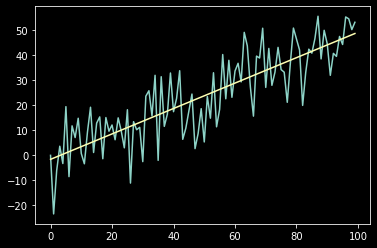

In [7]:
print(ab)
yyy=np.dot(E,ab)
plt.plot(x,yy)
plt.plot(x,yyy);